In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

from datetime import datetime

from urllib3.exceptions import InsecureRequestWarning
from urllib3 import disable_warnings
disable_warnings(InsecureRequestWarning)

In [164]:
df_0=pd.read_csv('CEB-table_peak_data.csv')
df1=df_0
df1=df1.drop('Unnamed: 0',axis=1)
df1.drop_duplicates(inplace=True)

In [167]:
df1['date_name']=[datetime.strptime(date,'%m/%d/%Y').strftime("%a") for date in df1['date']] 
df1

,Description,Active Power (MW),Reactive Power (Mvar),Time,date,date_name
0,Day peak,1272.2,371.6,16:00,2/27/2023,Mon
1,Night peak,2001.0,452.8,19:15,2/27/2023,Mon
2,Minimum demand,1129.0,151.6,04:00,2/27/2023,Mon
3,Day peak,1960.9,708.5,16:00,2/28/2023,Tue
4,Night peak,2190.8,471.3,19:00,2/28/2023,Tue
5,Minimum demand,1129.9,103.6,02:45,2/28/2023,Tue
6,Day peak,1868.3,639.4,15:45,3/1/2023,Wed
7,Night peak,2171.3,452.5,19:00,3/1/2023,Wed
8,Minimum demand,1197.1,112.3,03:15,3/1/2023,Wed
9,Day peak,1882.3,679.0,16:00,3/2/2023,Thu


In [47]:
dates=df1['date'].unique().tolist()

In [65]:
date=dates[0]
df_test=df1[df1['date']==date]
df_test.rename(columns={'Active Power (MW)':'AP {}'.format(date),'Reactive Power (Mvar)':'RP {}'.format(date),'Time':'Time {}'.format(date)},inplace=True)
df_test.drop(['date'],axis=1,inplace=True)
df_test=df_test.set_index('Description').T
df_test.reset_index(inplace=True)
df_test[['Power','date']]=df_test['index'].str.split(' ',expand=True)
df_test

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Description,index,Day peak,Night peak,Minimum demand,Power,date
0,AP 2/27/2023,1272.2,2001.0,1129.0,AP,2/27/2023
1,RP 2/27/2023,371.6,452.8,151.6,RP,2/27/2023
2,Time 2/27/2023,16:00,19:15,04:00,Time,2/27/2023


In [135]:
# df1[df1['Description']=='Day peak']
df1['date']=pd.to_datetime(df1['date'])
# df1['date'][0].weekday_name
# x=weekday_name
# x
# df1['date'][0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Description            42 non-null     object        
 1   Active Power (MW)      42 non-null     float64       
 2   Reactive Power (Mvar)  42 non-null     float64       
 3   Time                   42 non-null     object        
 4   date                   42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.0+ KB


In [155]:
x=datetime.strptime(df1['date'][0], '%m/%d/%Y')
x.strftime("%a")

'Mon'

<ipython-input-101-cd400f9b7f43>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=dates,rotation=90)


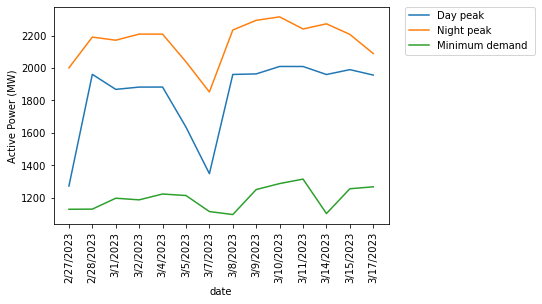

In [101]:
fig, ax=plt.subplots()
sns.lineplot(x='date', y='Active Power (MW)',hue='Description' ,data=df1,ax=ax)
# sns.lineplot(x='date', y='Active Power (MW)', data=df1[df1['Description']==df1['Description'].unique().tolist()[0]],ax=ax)
# sns.lineplot(x='date', y='Active Power (MW)', data=df1[df1['Description']==df1['Description'].unique().tolist()[1]],ax=ax)
ax.set_xticklabels(labels=dates,rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

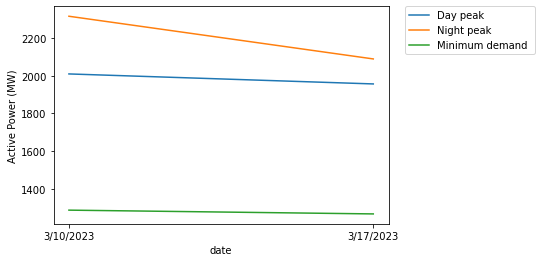

In [171]:
fig, ax=plt.subplots()
sns.lineplot(x='date', y='Active Power (MW)',hue='Description' ,data=df1[df1['date_name']=='Fri'],ax=ax)
# sns.lineplot(x='date', y='Active Power (MW)', data=df1[df1['Description']==df1['Description'].unique().tolist()[0]],ax=ax)
# sns.lineplot(x='date', y='Active Power (MW)', data=df1[df1['Description']==df1['Description'].unique().tolist()[1]],ax=ax)
# ax.set_xticklabels(labels=dates,rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [170]:
df1[df1['date_name']=='Fri']

,Description,Active Power (MW),Reactive Power (Mvar),Time,date,date_name
27,Day peak,2009.5,745.0,16:00,3/10/2023,Fri
28,Night peak,2315.3,629.1,19:00,3/10/2023,Fri
29,Minimum demand,1287.5,211.5,03:00,3/10/2023,Fri
48,Day peak,1956.5,674.4,15:30,3/17/2023,Fri
49,Night peak,2089.0,453.9,19:00,3/17/2023,Fri
50,Minimum demand,1267.5,224.9,03:15,3/17/2023,Fri


In [249]:
# df3=df1[['Daily Generation','Energy (GWh)']][df1['date']==dates[12]].set_index('Daily Generation')
# df3.rename(columns={'Energy (GWh)':dates[12]},inplace=True)
# df3=df3.T
# df3.head()

In [250]:
# df4=pd.concat([df4,df3])
# df4.head()

In [251]:
count=0
df_by_date=pd.DataFrame()
for date in dates:
    if(count==0):
        df_by_date=df1[['Daily Generation','Energy (GWh)']][df1['date']==date].set_index('Daily Generation')
        df_by_date.rename(columns={'Energy (GWh)':date},inplace=True)
        df_by_date=df_by_date.T
        count+=1
    elif(count!=15):
        df_temp=df1[['Daily Generation','Energy (GWh)']][df1['date']==date].set_index('Daily Generation')
        df_temp.rename(columns={'Energy (GWh)':date},inplace=True)
        df_temp=df_temp.T
#         df_temp.head()
        df_by_date=pd.concat([df_by_date,df_temp])
        count+=1
df_by_date.head(20)

Daily Generation,Laxapana Hydro Complex,Mahaweli Hydro Complex,Samanala Hydro Complex,CEB Thermal Coal,CEB Thermal Oil,IPP Thermal Oil,CEB Wind,SPP Wind,SPP Solar 1,SPP Biomass,SPP Minihydro 2,Total
2023-02-27,2.94,4.64,0.40,18.70,2.60,0.00,0.96,0.98,2.17,0.53,1.88,35.80
2023-02-28,3.99,4.69,0.71,19.52,3.71,4.46,0.77,0.81,2.00,0.23,1.75,42.64
2023-03-01,3.58,4.78,0.78,19.33,3.31,5.99,0.90,1.05,1.95,0.31,1.88,43.86
2023-03-02,3.29,3.68,0.96,19.49,4.56,5.41,0.99,1.16,1.98,0.30,1.88,43.70
2023-03-04,3.48,4.29,0.61,19.51,7.30,2.43,0.92,0.83,2.03,0.22,1.31,42.93
2023-03-05,3.14,4.47,0.54,19.50,7.18,0.00,0.91,0.56,2.02,0.22,1.31,39.85
2023-03-07,3.54,3.47,0.18,18.73,4.27,0.00,0.70,0.51,2.11,0.37,1.31,35.19
2023-03-08,3.85,4.16,0.65,19.14,6.70,2.60,0.86,0.52,2.02,0.33,1.31,42.16
2023-03-09,2.96,4.33,0.98,19.52,7.00,3.51,1.09,0.79,2.15,0.29,1.31,43.92
2023-03-10,3.78,3.76,1.13,19.57,7.37,3.54,1.16,0.94,2.10,0.32,1.31,44.98


In [252]:
df_by_date['Hydro']=df_by_date['Laxapana Hydro Complex']+df_by_date['Mahaweli Hydro Complex']+df_by_date['Samanala Hydro Complex']+df_by_date['SPP Minihydro 2']
df_by_date['Fuel']=df_by_date['CEB Thermal Oil']+df_by_date['IPP Thermal Oil']
df_by_date['Wind']=df_by_date['CEB Wind']+df_by_date['SPP Wind']

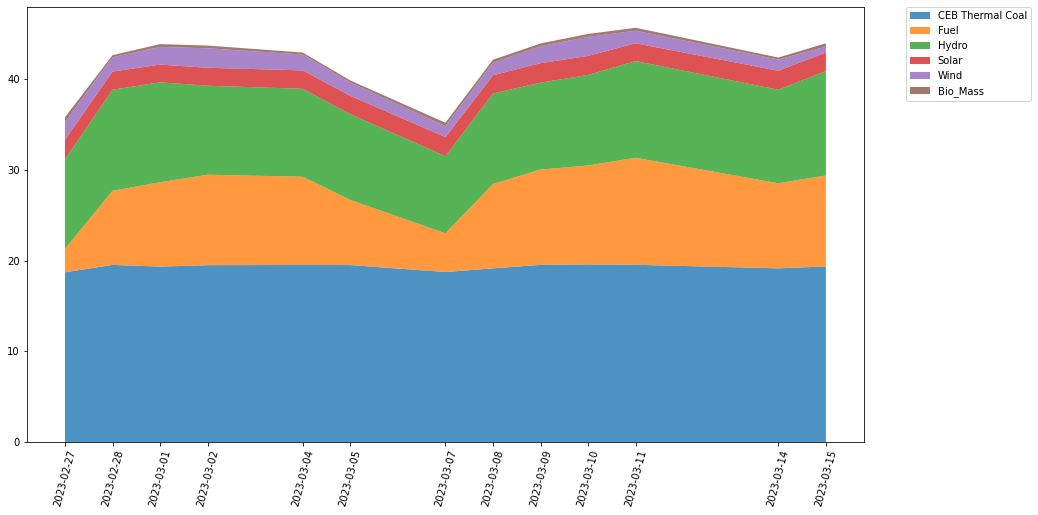

In [259]:
fig,ax=plt.subplots(figsize=(15,8))
plt.stackplot(df_by_date.index,
              [df_by_date['CEB Thermal Coal'], df_by_date['Fuel'],
               df_by_date['Hydro'],df_by_date['SPP Solar 1'], df_by_date['Wind'],df_by_date['SPP Biomass']],
              labels=['CEB Thermal Coal', 'Fuel', 'Hydro','Solar' ,'Wind','Bio_Mass'],
              alpha=0.8)
plt.xticks(df_by_date.index,rotation=75)
# ax.set_xticklabels(list(df_by_date.index),rotation=90)
plt.legend(loc=2, fontsize='large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [260]:
def save_df(df,file_name):
#     date=datetime.datetime.now().strftime("%Y-%m-%d-%H.%M")
    date=file_name+'.csv'
    file_path=Path(save_path+date)
    df.to_csv(file_path)
    
    print('Compled data scrapping for the date of {} and saved it into {}'\
          .format(datetime.datetime.now().strftime("%Y-%m-%d-%H.%M"),date))

In [266]:
save_path=r'C:\Users\dell\Desktop\Data\DataScraping\CEB_dirly_data\data/'
save_df(df_by_date,'CEB-table_energy_data_new')

Compled data scrapping for the date of 2023-03-15-18.01 and saved it into CEB-table_energy_data_new.csv


In [278]:
df_by_date=pd.read_csv('CEB-table_energy_data_new.csv')
df_by_date

,Unnamed: 0,date,Laxapana Hydro Complex,Mahaweli Hydro Complex,Samanala Hydro Complex,CEB Thermal Coal,CEB Thermal Oil,IPP Thermal Oil,CEB Wind,SPP Wind,SPP Solar 1,SPP Biomass,SPP Minihydro 2,Total
0,0,2/27/2023,2.94,4.64,0.40,18.70,2.60,0.00,0.96,0.98,2.17,0.53,1.88,35.80
1,1,2/28/2023,3.99,4.69,0.71,19.52,3.71,4.46,0.77,0.81,2.00,0.23,1.75,42.64
2,2,3/1/2023,3.58,4.78,0.78,19.33,3.31,5.99,0.90,1.05,1.95,0.31,1.88,43.86
3,3,3/2/2023,3.29,3.68,0.96,19.49,4.56,5.41,0.99,1.16,1.98,0.30,1.88,43.70
4,4,3/4/2023,3.48,4.29,0.61,19.51,7.30,2.43,0.92,0.83,2.03,0.22,1.31,42.93
5,5,3/5/2023,3.14,4.47,0.54,19.50,7.18,0.00,0.91,0.56,2.02,0.22,1.31,39.85
6,6,3/7/2023,3.54,3.47,0.18,18.73,4.27,0.00,0.70,0.51,2.11,0.37,1.31,35.19
7,7,3/8/2023,3.85,4.16,0.65,19.14,6.70,2.60,0.86,0.52,2.02,0.33,1.31,42.16
8,8,3/9/2023,2.96,4.33,0.98,19.52,7.00,3.51,1.09,0.79,2.15,0.29,1.31,43.92
9,9,3/10/2023,3.78,3.76,1.13,19.57,7.37,3.54,1.16,0.94,2.10,0.32,1.31,44.98


In [279]:
df_by_date['date']=pd.to_datetime(df_by_date['date'])
df_by_date['Hydro']=df_by_date['Laxapana Hydro Complex']+df_by_date['Mahaweli Hydro Complex']+df_by_date['Samanala Hydro Complex']+df_by_date['SPP Minihydro 2']
df_by_date['Fuel']=df_by_date['CEB Thermal Oil']+df_by_date['IPP Thermal Oil']
df_by_date['Wind']=df_by_date['CEB Wind']+df_by_date['SPP Wind']

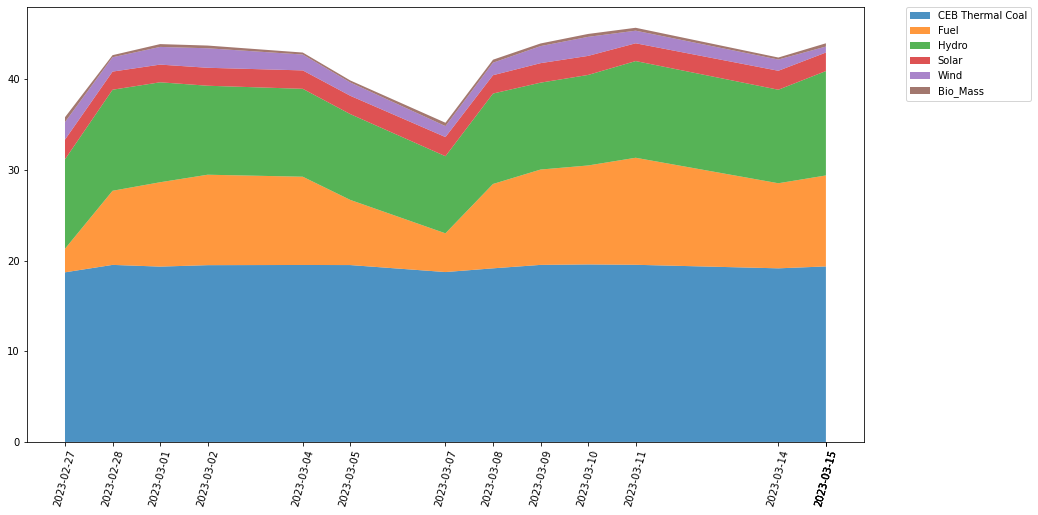

In [289]:
fig,ax=plt.subplots(figsize=(15,8))
plt.stackplot(df_by_date['date'],
              [df_by_date['CEB Thermal Coal'], df_by_date['Fuel'],
               df_by_date['Hydro'],df_by_date['SPP Solar 1'], df_by_date['Wind'],df_by_date['SPP Biomass']],
              labels=['CEB Thermal Coal', 'Fuel', 'Hydro','Solar' ,'Wind','Bio_Mass'],
              alpha=0.8)
plt.xticks(df_by_date['date'],rotation=75)
# ax.set_xticklabels(list(df_by_date.index),rotation=90)
plt.legend(loc=2, fontsize='large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [287]:
df_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              15 non-null     int64         
 1   date                    15 non-null     datetime64[ns]
 2   Laxapana Hydro Complex  15 non-null     float64       
 3   Mahaweli Hydro Complex  15 non-null     float64       
 4   Samanala Hydro Complex  15 non-null     float64       
 5   CEB Thermal Coal        15 non-null     float64       
 6   CEB Thermal Oil         15 non-null     float64       
 7   IPP Thermal Oil         15 non-null     float64       
 8   CEB Wind                15 non-null     float64       
 9   SPP Wind                15 non-null     float64       
 10  SPP Solar 1             15 non-null     float64       
 11  SPP Biomass             15 non-null     float64       
 12  SPP Minihydro 2         15 non-null     float64     

In [311]:
column_order=['date','CEB Thermal Coal','Fuel','Hydro','Wind','SPP Biomass']

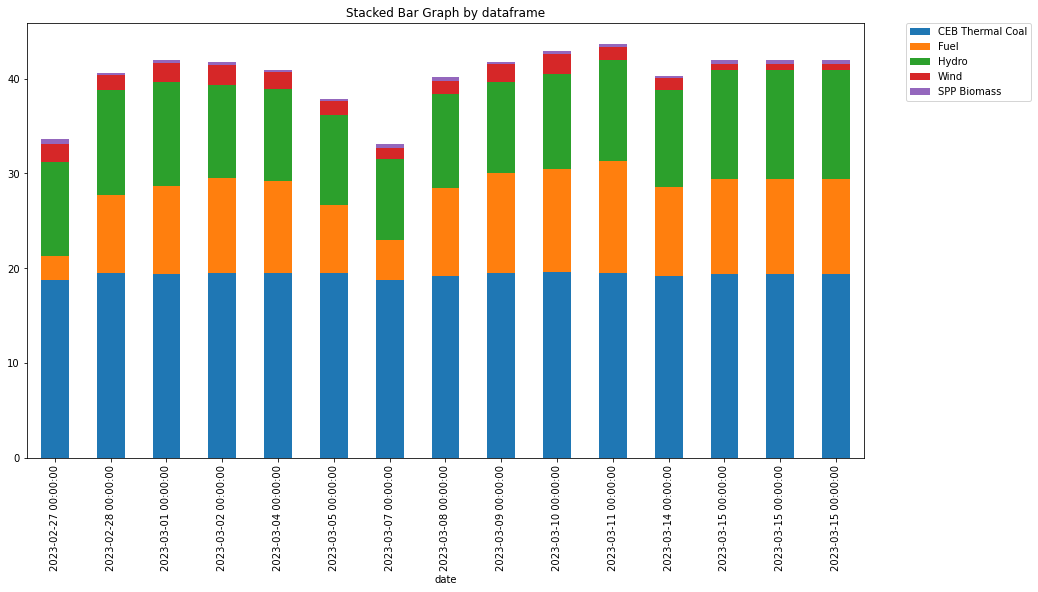

In [317]:
fig,ax=plt.subplots(figsize=(15,8))
df_by_date[column_order].plot(x='date', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe',ax=ax)
# ax.xticks(df_by_date['date'],rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [305]:
df_by_date['date']

0    2023-02-27
1    2023-02-28
2    2023-03-01
3    2023-03-02
4    2023-03-04
5    2023-03-05
6    2023-03-07
7    2023-03-08
8    2023-03-09
9    2023-03-10
10   2023-03-11
11   2023-03-14
12   2023-03-15
13   2023-03-15
14   2023-03-15
Name: date, dtype: datetime64[ns]

In [318]:
import streamlit as st

In [ ]:
st.title('Uber pickups in NYC')